# Correlation 

content:
* correlation between the variables about Transport - bad for lin.Regression
* Problem "Cooking with Airfryer" and "Cooking with Grill"
* Correlation-metric for chosing what varialbes have big impact

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

df=pd.read_csv('Carbon_Emission.csv',sep=";")

# Change display settings to show all columns
pd.set_option('display.max_columns', None)

df.head(4)

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074


,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
0,230,210,4,7,26,1,2238
1,114,9,3,9,38,5,1892
2,138,2472,1,14,47,6,2595
3,157,74,3,20,5,7,1074
4,266,8457,1,3,5,6,4743
...,...,...,...,...,...,...,...
9995,230,268,5,12,27,9,2408
9996,234,5316,3,14,8,24,3084
9997,298,96,5,11,5,24,2377
9998,179,8688,5,19,14,5,4574


### "Transport" and "Vehicle Type"

In [21]:
##creates new column "Transport Vehicle Type"
df["Transport Vehicle Type"]=df["Vehicle Type"] #definiere neue Spalte
df.loc[df["Transport Vehicle Type"].isna(), "Transport Vehicle Type"] = df["Transport"] # Werte aus 'Transport' übernehmen, wenn 'Vehicle Type' NaN ist

df[["Transport","Vehicle Type","Transport Vehicle Type"]].head()

,Transport,Vehicle Type,Transport Vehicle Type
0,public,NaN,public
1,walk/bicycle,NaN,walk/bicycle
2,private,petrol,petrol
3,walk/bicycle,NaN,walk/bicycle
4,private,diesel,diesel


In [22]:
##create dummy-variable for Transport

dummy_variable_Transport= list(df['Transport'].unique()) # Liste aller einzigartigen Recycling-Möglichkeiten
# Für jede einzigartige Transport-Möglichkeit eine neue Spalte hinzufügen und mit 0 oder 1 füllen
for item in dummy_variable_Transport:
    df['Transport '+str(item)] = df['Transport'].apply(lambda x: 1 if item == x else 0)

df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission,Transport Vehicle Type,Transport public,Transport walk/bicycle,Transport private
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238,public,1,0,0
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892,walk/bicycle,0,1,0
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595,petrol,0,0,1
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074,walk/bicycle,0,1,0
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743,diesel,0,0,1


In [23]:
##create dummy-variable for Vehicle_Type

import numpy as np
df.replace(np.nan, 'does not drive', inplace=True) #We can see that we have missing values if the person does not drive. So, we can replace these values, not delete them.


dummy_variable_Vehicle_Type= list(df['Vehicle Type'].unique()) # Liste aller einzigartigen Recycling-Möglichkeiten
# Für jede einzigartige Vehicle_Type-Möglichkeit eine neue Spalte hinzufügen und mit 0 oder 1 füllen
for item in dummy_variable_Vehicle_Type:
    df['Vehicle Type '+str(item)] = df['Vehicle Type'].apply(lambda x: 1 if item == x else 0)

df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission,Transport Vehicle Type,Transport public,Transport walk/bicycle,Transport private,Vehicle Type does not drive,Vehicle Type petrol,Vehicle Type diesel,Vehicle Type hybrid,Vehicle Type lpg,Vehicle Type electric
0,overweight,female,pescatarian,daily,coal,public,does not drive,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238,public,1,0,0,1,0,0,0,0,0
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,does not drive,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892,walk/bicycle,0,1,0,1,0,0,0,0,0
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595,petrol,0,0,1,0,1,0,0,0,0
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,does not drive,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074,walk/bicycle,0,1,0,1,0,0,0,0,0
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743,diesel,0,0,1,0,0,1,0,0,0


### variables "Recycling" and "Cooking_With" (these variables allow multiple answers)

In [24]:

##create dummy-variables for "Recycling": 
unique_values_Recycling= set([item for sublist in df['Recycling'].unique() for item in eval(sublist)]) # Liste aller einzigartigen Recycling-Möglichkeiten
# Für jede einzigartige Recycling-Möglichkeit eine neue Spalte hinzufügen und mit 0 oder 1 füllen
for item in unique_values_Recycling:
    df['Recycling '+str(item)] = df['Recycling'].apply(lambda x: 1 if item in x else 0)

##create dummy-variables for "Cooking With": 
unique_values_cooking_With= set([item for sublist in df['Cooking_With'].unique() for item in eval(sublist)]) # Liste aller einzigartigen Cooking_With-Möglichkeiten
# Für jede einzigartige Cooking_With-Möglichkeit eine neue Spalte hinzufügen und mit 0 oder 1 füllen
for item in unique_values_cooking_With:
    df['Cooking With '+str(item)] = df['Cooking_With'].apply(lambda x: 1 if item in x else 0)



# Probleme bei Airfryer and Grill

Cooking With Airfryer  Cooking With Grill
0                      0                     5008
1                      1                     4992
dtype: int64


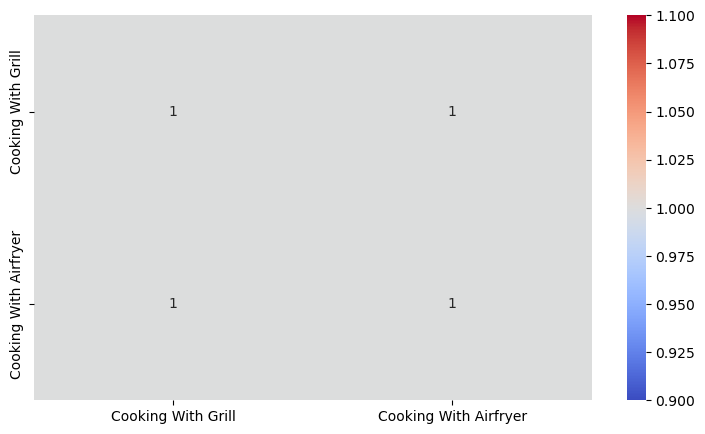

,Cooking_With,Cooking With Grill,Cooking With Airfryer
0,"['Stove', 'Oven']",0,0
1,"['Stove', 'Microwave']",0,0
2,"['Oven', 'Microwave']",0,0
4,['Oven'],0,0
5,"['Stove', 'Oven', 'Microwave']",0,0
...,...,...,...
9991,['Microwave'],0,0
9993,['Oven'],0,0
9994,"['Oven', 'Microwave']",0,0
9995,['Microwave'],0,0


In [34]:
##create dummy-variables for "Cooking With": 
df['Cooking With Grill'] = df['Cooking_With'].apply(lambda x: 1 if "Grill" in x else 0)
df['Cooking With Airfryer'] = df['Cooking_With'].apply(lambda x: 1 if "Airfryer" in x else 0)


#what are the values for the variables "Cooking With Airfryer","Cooking With Grill"
print(df.groupby(["Cooking With Airfryer","Cooking With Grill"]).size())

import matplotlib.pyplot as plt
correlations = df[["Cooking With Grill", "Cooking With Airfryer"]].corr()
plt.figure(figsize=(9, 5))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

#all people where "Cooking With" is Grill
df[df["Cooking With Grill"] == 1][["Cooking_With", "Cooking With Grill", "Cooking With Airfryer"]]


### value-ordering

In [ ]:
#!!! ich weiß nicht ob nachher pd.Categorical später probleme macht?
# in future: if i filte columns with strings for I have to include 'category' to "object" too:  df.select_dtypes(include=['object','category']) 


#ordering values of ordinal categorical variables

# dictonary of ordinal categorical variables. perpose of this dictonary: values of categorical variables can be ordered
dict_variables_ordinal_categorical = {
    'Body Type': ['underweight', 'normal', 'overweight', 'obese'],
    'Diet': ['omnivore', 'pescatarian', 'vegetarian','vegan'],
    'How Often Shower': ['less frequently','daily', 'twice a day','more frequently'],
    'Social Activity': ['never', 'sometimes','often'],
    'Frequency of Traveling by Air': ['never', 'rarely', 'frequently', 'very frequently'],
    'Waste Bag Size': ['small','medium', 'large', 'extra large'],
    'Energy efficiency': ['Yes', 'Sometimes', 'No']
}
#Kategorien definieren: Verwende pd.Categorical, um die values von ordinal categorical variables in der gewünschten Reihenfolge zu definieren. Die Option ordered=True stellt sicher, dass die Kategorien als geordnet behandelt werden.
for key, values in dict_variables_ordinal_categorical.items():
    df[key] = pd.Categorical(df[key], categories=values, ordered=True)

#print(df['Body Type'].unique()) #hier sieht man dass als Werte weiterhin irgendwie ausgegeben werden aber es auch Categorie gibt die die Werte ordnen kann.
#df['Body Type'].unique().tolist() 

### Encoding 

In [ ]:
#changes categorical variables to numbers

from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object','category']).columns    

label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission,Transport Vehicle Type,Transport public,Transport walk/bicycle,Transport private,Vehicle Type does not drive,Vehicle Type petrol,Vehicle Type diesel,Vehicle Type hybrid,Vehicle Type lpg,Vehicle Type electric,Recycling Glass,Recycling Metal,Recycling Plastic,Recycling Paper,Cooking With Grill,Cooking With Microwave,Cooking With Stove,Cooking With Airfryer,Cooking With Oven
0,2,0,1,0,0,1,1,1,230,0,210,1,4,7,26,1,0,2,13,2238,5,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1,1,0,3,1,2,2,1,1,114,2,9,0,3,9,38,5,0,2,9,1892,6,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,2,1,0,2,3,0,5,0,138,1,2472,3,1,14,47,6,1,2,5,2595,4,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
3,2,1,0,3,3,2,1,2,157,2,74,2,3,20,5,7,1,6,1,1074,6,0,1,0,1,0,0,0,0,0,1,1,1,1,1,1,0,1,0
4,1,0,3,0,0,0,0,1,266,3,8457,1,1,3,5,6,2,10,6,4743,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


# Correlation for chosing the most important variables


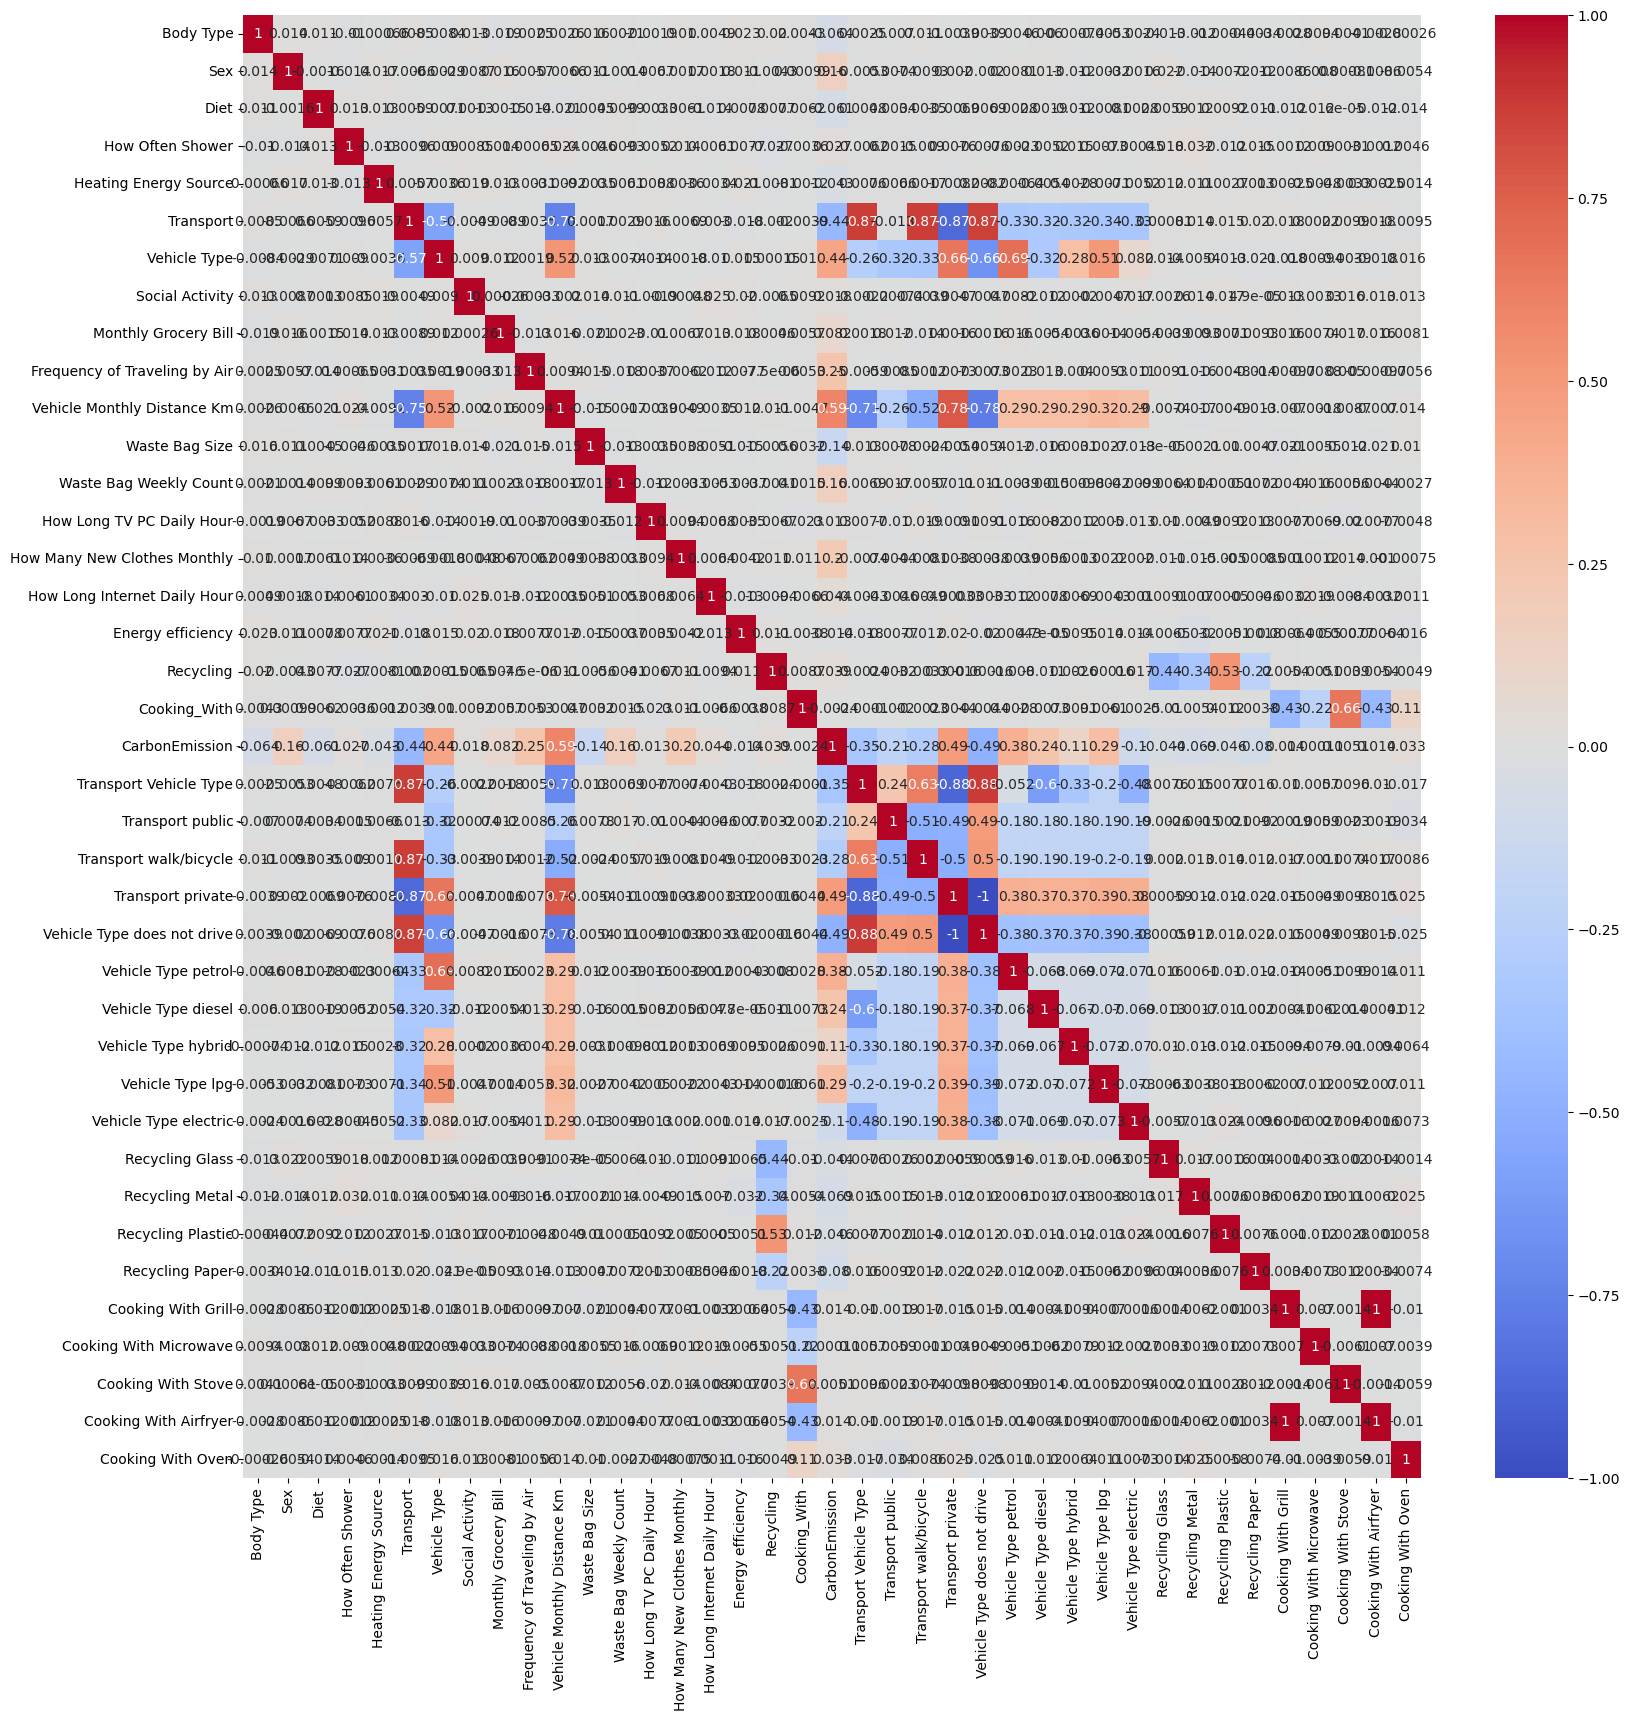

In [ ]:
import matplotlib.pyplot as plt

columns_with_no_information=["Vehicle Type","Transport Vehicle Type","Vehicle Type does not drive","Transport private","Transport",'Body Type', 'Sex','Diet','How Often Shower','Heating Energy Source','Social Activity',"Monthly Grocery Bill",'Frequency of Traveling by Air','Waste Bag Size','Energy efficiency',"Waste Bag Weekly Count", "How Long TV PC Daily Hour","How Many New Clothes Monthly", "How Long Internet Daily Hour","Recycling" ,"Cooking_With"]


#correlations = df.drop(columns_with_no_information,axis=1).corr(method='pearson')

#correlations = df.drop(columns_with_no_information,axis=1).corr()
correlations = df.corr()

plt.figure(figsize=(19, 19))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [ ]:
#Hinweis: Pandas Version 2.0
#Falls du Pandas Version 2.0 oder neuer verwendest, könnte ein Fehler auftreten:
#"could not convert string to float". Dies liegt daran, dass seit Version 2.0 der Parameter `numeric_only=True` zu der Methode `df.corr` hinzugefügt werden muss. Die korrigierte Zeile sieht dann so aus:
#df.corr(numeric_only=True)["CarbonEmission"].abs().sort_values(ascending=False)

df.corr()["CarbonEmission"].abs().sort_values(ascending=False)


CarbonEmission                   1.000000
Vehicle Monthly Distance Km      0.594171
Transport private                0.488520
Vehicle Type does not drive      0.488520
Transport                        0.440264
Vehicle Type                     0.439097
Vehicle Type petrol              0.382708
Transport Vehicle Type           0.347184
Vehicle Type lpg                 0.291281
Transport walk/bicycle           0.276308
Frequency of Traveling by Air    0.245712
Vehicle Type diesel              0.243221
Transport public                 0.208929
How Many New Clothes Monthly     0.198887
Sex                              0.163895
Waste Bag Weekly Count           0.159193
Waste Bag Size                   0.142395
Vehicle Type hybrid              0.113084
Vehicle Type electric            0.101690
Monthly Grocery Bill             0.081587
Recycling Paper                  0.079582
Recycling Metal                  0.069098
Body Type                        0.064030
Diet                             0